In [15]:
import pandas as pd

moist = pd.read_csv('/home/pi/irrigation/test.csv')
# moist = pd.read_csv('test.csv')

In [16]:
moist.columns = ["Timetemp", "Temp", "Humidity"]
moist

,Timetemp,Temp,Humidity
0,20190524 16:19:41,19.2812,25.5513
1,20190524 16:20:42,19.3750,25.5064
2,20190524 16:21:43,19.5000,25.8244
3,20190524 16:22:44,19.7188,25.8364
4,20190524 16:23:44,19.5625,25.8278
5,20190524 16:24:45,19.5938,25.4686
6,20190524 16:25:46,19.6250,25.8313
7,20190524 16:26:47,19.5938,25.8296
8,20190524 16:27:48,19.4688,25.8227
9,20190524 16:28:49,19.3750,25.8175


In [17]:
moist['Time'] = pd.to_datetime(moist["Timetemp"])
moist = moist.drop(columns='Timetemp')
moist.dtypes

Temp               float64
Humidity           float64
Time        datetime64[ns]
dtype: object

In [18]:
# moist['Time'].head()


In [19]:
moist = moist.set_index('Time')
# moist.head()


In [20]:
moist['Week']=moist.index.weekofyear
# moist['freq']=moist.index.freq
moist.tail()

,Temp,Humidity,Week
Time,,,
2019-06-15 22:08:45,12.6250,32.2687,24
2019-06-15 22:09:52,12.6562,32.0177,24
2019-06-15 22:10:58,12.6875,32.0827,24
2019-06-15 22:11:58,12.5625,32.0743,24
2019-06-15 22:12:59,12.6250,31.5839,24


In [21]:
import matplotlib.pyplot as plt

# moist['Humidity'].plot()

In [22]:
# moist['2019-06-01 14:00':].Humidity.plot(legend=True)
# moist['2019-06-01 14:00':].Temp.plot(secondary_y=True,label='Temp',legend=True)

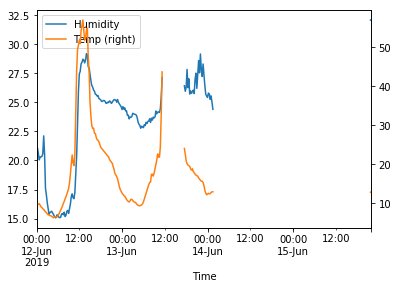

In [23]:
import datetime
hstart = datetime.datetime.now() - datetime.timedelta(3)
hstr = hstart.strftime('%Y-%m-%d')
hourly = moist.resample('15Min').mean()
hourly[hstr:].Humidity.plot(legend=True)
hourly[hstr:].Temp.plot(secondary_y=True,legend=True)


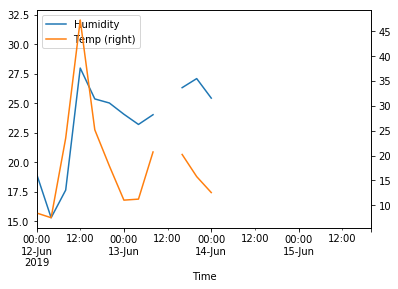

In [24]:
daily = moist.resample('4h').mean()
daily[hstr:].Humidity.plot(legend=True)
daily[hstr:].Temp.plot(secondary_y=True,legend=True)


In [25]:
submoist=moist[hstr:]
m=submoist[1:].Humidity.values
tt=submoist.index-submoist.index[0]
trendStart = submoist.index[0]
tt=tt[1:]
tf=tt.to_frame()

daysfcst = 3

# mt=tt.astype('timedelta64[m]')
tt1=tf.Time.values.astype('float64')
# tt1
mt=tt1.reshape(-1,1)
print(mt, mt.max())
mtmro=mt.max()+(24*3600*daysfcst)
print(mtmro.reshape(-1,1))
# mt=tt.to_pytimedelta
# print(mt.dtype,mt)
# print( m.dtype,m)

[[  6.10000000e+10]
 [  1.21000000e+11]
 [  1.82000000e+11]
 ..., 
 [  3.39020000e+14]
 [  3.39080000e+14]
 [  3.39141000e+14]] 3.39141e+14
[[  3.39141000e+14]]


In [26]:
from sklearn import datasets, linear_model
import numpy as np

fdate=submoist.index.max() + datetime.timedelta(daysfcst)

regr = linear_model.LinearRegression()
regr.fit(mt,m)
mtmro=mt.max()+(24*3600*10)
print(mt.max(), '\n',np.array(mtmro))
newmt=np.array(mtmro).reshape(-1,1)
z=regr.predict(newmt)
print('New future time\t',fdate,'\npredicted\t',z,'\nslope\t',regr.coef_)


3.39141e+14 
 339141000864000.0
New future time	 2019-06-18 22:12:59 
predicted	 [ 35.53885649] 
slope	 [  4.83563643e-14]


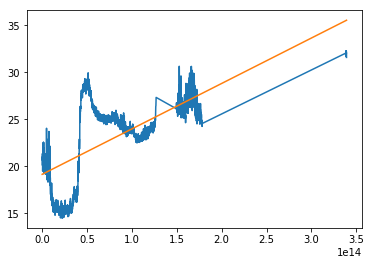

In [27]:
import matplotlib.pyplot as plt
plt.plot(mt,m)
plt.plot(mt,regr.predict(mt))

In [29]:
#from datetime import datetime
#print(datetime.datetime.now().timestamp)
# print(datetime.now())

In [29]:
from datetime import datetime,timedelta
startDate = datetime.now()-timedelta(2)
print (startDate.strftime('%Y-%m-%d'),'\n\n')

strtDate =startDate.strftime('%Y-%m-%d')

submoist=moist[strtDate:]
m=submoist[1:].Humidity.values
tt=submoist.index-submoist.index[0]
tt=tt[1:]
tf=tt.to_frame()

daysfcst = 3
fdate = (datetime.now() + timedelta(daysfcst)).strftime('%Y-%m-%d')

tt1=tf.Time.values.astype('float64').reshape(-1,1)

from sklearn import datasets, linear_model
import numpy as np
regr = linear_model.LinearRegression()
regr.fit(tt1,m)
mtmro=mt.max()+(24*3600*daysfcst)
print(mt.max(), '\n',np.array(mtmro))
newmt=np.array(mtmro).reshape(-1,1)
z=regr.predict(newmt)
print('New future time\t',fdate,'\npredicted\t',z,'\nslope\t',regr.coef_)



2019-06-13 


3.39141e+14 
 339141000259200.0
New future time	 2019-06-18 
predicted	 [ 36.36233044] 
slope	 [  3.88760583e-14]
